# Regression Analysis on House Prices

Here we will be working through regression model with the steps as:

Step 1: Getting and setting up the data.
Step 2: Preprocessing the data.
Step 3: Visualizing current data.
Step 4: 
Step 5:   
Step 6: 

Step 1: Getting and setting up the data.

IMPORT PACKAGES

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from scipy.stats import skew

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.offline as pyo
import plotly.graph_objs as go

In [3]:
import os
from IPython.display import Image, display, HTML

In [4]:
train = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [5]:
train_ID = train['Id']
test_ID = testing['Id']

In [32]:
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,4,0,5,2,...,0,0,0,3,4,1,0,1,2,8,4,208500
1,0,3,80.0,9600,1,1,3,3,2,0,24,1,...,0,0,0,3,4,1,0,4,1,8,4,181500
2,5,3,68.0,11250,1,1,0,3,4,0,5,2,...,0,0,0,3,4,1,0,8,2,8,4,223500
3,6,3,60.0,9550,1,1,0,3,0,0,6,2,...,0,0,0,3,4,1,0,1,0,8,0,140000
4,5,3,84.0,14260,1,1,0,3,2,0,15,2,...,0,0,0,3,4,1,0,11,2,8,4,250000


In [33]:
testing.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,15,3,70.0,7000,1,1,3,3,4,0,12,0,...,0,0,0,0,2,4,1,0,2,0,8,4
1455,15,4,56.0,7745,1,0,3,3,4,0,17,2,...,28,0,0,0,2,4,1,0,3,0,8,4
1456,15,4,50.0,6000,1,1,3,3,4,0,17,2,...,0,0,0,0,2,4,1,0,5,0,8,4
1457,15,2,58.0,6430,1,1,3,0,0,0,18,1,...,0,0,0,0,2,4,1,0,6,0,8,0
1458,15,0,50.0,9000,1,1,3,3,4,0,9,2,...,0,0,0,0,2,4,1,0,9,0,8,0


In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
train.shape

(1460, 81)

In [10]:
testing.shape

(1459, 80)

In [11]:
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [12]:
train.columns[train.isnull().any()]
testing.columns[testing.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [13]:
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

This implies that the PoolQC columns has 99.52 of the data missing, followed my MiscFeature which has 96.30 missing values.

In [14]:
Isnull = Isnull.to_frame()

In [15]:
Isnull.columns = ['count']

In [16]:
Isnull.index.names = ['Name']

In [17]:
Isnull['Name'] = Isnull.index

# PLOT OF MISSING VALUES

<Figure size 864x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

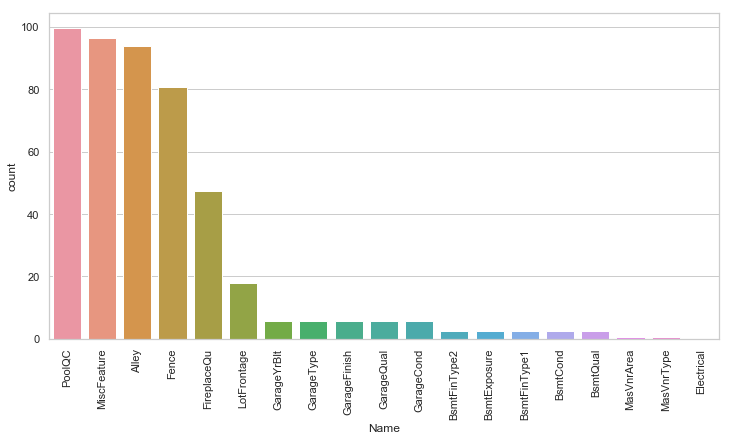

In [18]:
#plot Missing values
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [19]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will replace null values with other specific values.

If the percentage of null values in a column is very high, it it replaced by None.

If the percenatge of null values is insignificant, we replace it with the column's median values.


# Replacing with none

In [20]:
train['PoolQC'] = train['PoolQC'].fillna('None')
testing['PoolQC'] = testing['PoolQC'].fillna('None')

In [21]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

testing['MiscFeature'] = testing['MiscFeature'].fillna('None')
testing['Alley'] = testing['Alley'].fillna('None')
testing['Fence'] = testing['Fence'].fillna('None')
testing['FireplaceQu'] = testing['FireplaceQu'].fillna('None')

In [22]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')
    testing[col] = testing[col].fillna('None')

In [23]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))
    testing[col] = testing[col].fillna(int(0))

In [24]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')
    testing[col] = testing[col].fillna('None')

In [25]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))
testing['MasVnrArea'] = testing['MasVnrArea'].fillna(int(0))

In [26]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
testing['MasVnrType'] = testing['MasVnrType'].fillna('None')

In [27]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]
testing['Electrical'] = testing['Electrical'].fillna(train['Electrical']).mode()[0]

In [28]:
train = train.drop(['Id'], axis=1)
train = train.drop(['Utilities'], axis=1)
testing = testing.drop(['Utilities'], axis=1)
testing = testing.drop(['Id'], axis=1)


# Replace with median values

In [29]:
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

testing['LotFrontage'] = testing.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [30]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

# Label Encoders are used to transform non-numerical labels to numerical labels

In [31]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    
    lbl.fit(list(testing[c].values)) 
    testing[c] = lbl.transform(list(testing[c].values))    

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [34]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,4,0,5,2,...,0,0,0,3,4,1,0,1,2,8,4,208500
1,0,3,80.0,9600,1,1,3,3,2,0,24,1,...,0,0,0,3,4,1,0,4,1,8,4,181500
2,5,3,68.0,11250,1,1,0,3,4,0,5,2,...,0,0,0,3,4,1,0,8,2,8,4,223500
3,6,3,60.0,9550,1,1,0,3,0,0,6,2,...,0,0,0,3,4,1,0,1,0,8,0,140000
4,5,3,84.0,14260,1,1,0,3,2,0,15,2,...,0,0,0,3,4,1,0,11,2,8,4,250000


In [37]:
print(testing.head())

   MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0           0         2         80.0    11622       1      1         3   
1           0         3         81.0    14267       1      1         0   
2           0         3         63.0     7980       1      1         0   
3           0         3         85.0    10176       1      1         3   
4           0         3         70.0     8400       1      1         3   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  ...  \
0            3          4          0            12           1  ...   
1            3          0          0            12           2  ...   
2            3          4          0             8           2  ...   
3            3          4          0             8           2  ...   
4            3          0          0            12           2  ...   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  \
0              0          0          120         0       2 

In [38]:
y = train['SalePrice']

In [39]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# Data visualization

This will provide a dropdown menu with all the parameters. Default Settings :

1. y - SalePrice
2. Theme - henanigans
3. colorscale - paired

In [40]:
import cufflinks as cf

@interact
def scatter_plot(x=list(train.select_dtypes('number').columns), 
                 y=list(train.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    train.iplot(kind='scatter', 
                x=x, y=y, 
                mode='markers', 
                xTitle=x.title(), 
                yTitle=y.title(), 
                title=f'{y.title()} vs {x.title()}',
                theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', '…

In [41]:
data= train

In [42]:
X = train.drop(['SalePrice'], axis=1).values
y = y.values

# LINEAR REGRESSION MODEL

In [43]:
from sklearn import linear_model
model = linear_model.LinearRegression()

Split data into train and test format

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Fit and Train the model

In [45]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Perform Prediction on one Specific row

In [46]:
#Prediction
print("Predict value " + str(model.predict([X_test[132]])))
print("Real value " + str(y_test[132]))

Predict value [130148.82625138]
Real value 132000


In [47]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  86.24010351282442


In [48]:
x = model.predict(X_test)
f = pd.DataFrame()
f['Test Values'] = y_test
f['Predicted Values'] = x
f.head(15)

,Test Values,Predicted Values
0,152000,156753.988598
1,189000,212733.947288
2,172785,177912.502479
3,60000,75626.338561
4,123000,137594.823031
5,318000,304828.929944
6,142500,155416.132863
7,124000,120479.717228
8,137000,168238.866806
9,129500,116898.732186


# Random forest method

Random Forests are an ensemble of k untrained Decision Trees (trees with only a root node) trained using a variant of the random subspace method or feature bagging method.

Note the method of training random forests is not quite as straightforward as applying bagging to a bunch of individual decision trees and then simply aggregating the output. The procedure for training a random forest is as follows:

At the current node, randomly select p features from available features D. The number of features p is usually much smaller than the total number of features D.Compute the best split point for tree k using the specified splitting metric (Gini Impurity, Information Gain, etc.) and split the current node into daughter nodes and reduce the number of features D from this node on.

Repeat steps 1 to 2 until either a maximum tree depth l has been reached or the splitting metric reaches some extrema.
   
Repeat steps 1 to 3 for each tree k in the forest. •Vote or aggregate on the output of each tree in the forest



Import model

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

In [50]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Perform Prediction on one Specific row


In [51]:
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [124433.34]
Real value 128950


Calculate Final Accuracy Score of the entire model

In [52]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  91.06280318958287


# Gradient Boosting Regressor

Gradient boosting regressors are a type of inductively generated tree ensemble model. At each step, a new tree is trained against the negative gradient of the loss function, which is analogous to (or identical to, in the case of least-squares error) the residual error.
Gradient boosting models work best when all of the input features have been normalized to have zero mean and unit variance.

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100)

In [91]:
#Fit
model.fit(X_train, y_train)

Epoch 1/1
1168/1168 [==============================] - 0s 94us/step - loss: 5.8941e-04


In [64]:
#Prediction
print("Predict value " + str(model.predict([X_test[158]])))
print("Real value " + str(y_test[158]))

Predict value [265612.32836094]
Real value 295493


In [56]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  92.06225344926573


# Neural Network Method

In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [58]:

f = data

In [59]:

scalerx = MinMaxScaler(feature_range=(0, 1))
scalery = MinMaxScaler(feature_range=(0, 1))
datax=train.drop('SalePrice', axis=1).values
datay=train[['SalePrice']].values
scaled_trainx = scalerx.fit_transform(datax)
scaled_trainy = scalery.fit_transform(datay)
# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scalerx.scale_[13], scalerx.min_[13]))
multiplied_by = scalerx.scale_[13]
added = scalerx.min_[13]

# scaled_train_df = pd.DataFrame(scaled_train, columns=f.columns)

Note: median values were scaled by multiplying by 0.2500000000 and adding 0.000000


C:\Users\Hemangi nale\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [60]:
scaled_trainx = pd.DataFrame(scaled_train)


NameError: name 'scaled_train' is not defined

In [65]:
scaled_trainx.columns = f.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [66]:
scaled_trainx.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [67]:
data1=testing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_testing = scalerx.fit_transform(data1)

# Print out the adjustment that the scaler applied to the total_earnings column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[13], scaler.min_[13]))
multiplied_by = scalerx.scale_[13]
added = scalerx.min_[13]


C:\Users\Hemangi nale\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [68]:
scaled_testing_df = pd.DataFrame(scaled_testing)


In [69]:
scaled_testing_df.columns = data1.columns

In [70]:
scaled_testing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.0,0.4,0.329609,0.184147,1.0,0.5,1.0,1.0,1.0,0.0,0.500000,0.125,...,0.0,0.0,0.208333,0.0,1.0,0.5,0.333333,0.000000,0.454545,1.0,0.888889,0.8
1,0.0,0.6,0.335196,0.232124,1.0,0.5,0.0,1.0,0.0,0.0,0.500000,0.250,...,0.0,0.0,0.000000,0.0,1.0,1.0,0.000000,0.735294,0.454545,1.0,0.888889,0.8
2,0.0,0.6,0.234637,0.118085,1.0,0.5,0.0,1.0,1.0,0.0,0.333333,0.250,...,0.0,0.0,0.000000,0.0,1.0,0.0,1.000000,0.029412,0.181818,1.0,0.888889,0.8
3,0.0,0.6,0.357542,0.157918,1.0,0.5,1.0,1.0,1.0,0.0,0.333333,0.250,...,0.0,0.0,0.000000,0.0,1.0,1.0,0.333333,0.000000,0.090909,1.0,0.888889,0.8
4,0.0,0.6,0.273743,0.125703,1.0,0.5,1.0,1.0,0.0,0.0,0.500000,0.250,...,0.0,0.0,0.000000,0.0,1.0,0.5,0.333333,0.000000,0.272727,1.0,0.888889,0.8


In [71]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

W0715 15:45:10.356445  9192 deprecation_wrapper.py:119] From C:\Users\Hemangi nale\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 15:45:11.168882  9192 deprecation_wrapper.py:119] From C:\Users\Hemangi nale\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [72]:
scaled_trainx.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [78]:
X = scaled_trainx
y = scaled_trainy

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [80]:
model.fit(np.array(X_train),np.array(y_train), epochs=20, batch_size=7)

Epoch 1/20
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0197
Epoch 2/20
1168/1168 [==============================] - 0s 294us/step - loss: 0.0031
Epoch 3/20
1168/1168 [==============================] - 0s 254us/step - loss: 0.0027
Epoch 4/20
1168/1168 [==============================] - 0s 254us/step - loss: 0.0024
Epoch 5/20
1168/1168 [==============================] - 0s 254us/step - loss: 0.0021
Epoch 6/20
1168/1168 [==============================] - 0s 281us/step - loss: 0.0020
Epoch 7/20
1168/1168 [==============================] - 0s 254us/step - loss: 0.0021
Epoch 8/20
1168/1168 [==============================] - 0s 254us/step - loss: 0.0015
Epoch 9/20
1168/1168 [==============================] - 0s 268us/step - loss: 0.0016
Epoch 10/20
1168/1168 [==============================] - 0s 254us/step - loss: 0.0014
Epoch 11/20
1168/1168 [==============================] - 0s 268us/step - loss: 0.0020
Epoch 12/20
1168/1168 [==============================] - 0s 294us

In [81]:
x = model.predict(np.array(X_test))
f = pd.DataFrame(index=np.arange(len(y_test)))
f['Test Values'] = y_test
f['Predicted Values'] = x
f.head(15)

,Test Values,Predicted Values
0,0.162616,0.175177
1,0.213998,0.260843
2,0.191480,0.214235
3,0.034856,0.129602
4,0.122344,0.132384
5,0.393140,0.441770
6,0.149424,0.163606
7,0.123733,0.149695
8,0.141786,0.150693
9,0.131371,0.147832


In [86]:
print("Predict value " + str(model.predict(np.array([X_test[130]]))))
print("Real value " + str(y_test[130]))

Predict value [[0.16517662]]
Real value [0.1653937]


In [83]:
y_test.shape

(292, 1)

In [84]:
len(x)

292

In [85]:
predictions=model.predict(X_test)
evaal=model.evaluate(X_test, y_test)
evaal

292/292 [==============================] - 0s 54us/step


0.0020337160700638715

In [87]:
# summarize model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                3950      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 14,151
Trainable params: 14,151
Non-trainable params: 0
_________________________________________________________________


In [88]:
testing.shape

(1459, 78)

In [89]:
print("Predict value " + str(model.predict(np.array([X_train[130]]))))
print("Real value " + str(y_train[130]))

Predict value [[0.22059847]]
Real value [0.1987224]


In [ ]:
yy=model.predict(np.array(scaled_testing_df))

In [ ]:
yy.shape

In [ ]:
(yy)

In [ ]:
yyy = scalery.inverse_transform(yy)

In [ ]:
yyy

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = yyy
sub.to_csv('submissionFinal.csv',index=False)